In [9]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize
import ase

In [10]:
KS_KE = []
for i in np.arange(0,30,1):
    with open('/Users/valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_ke = str(k).split()[6]
    KS_KE.append(float(KS_ke)) 
ks_ke = np.asarray(KS_KE)

In [11]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        return diff

In [12]:
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    i = int(n)
    rho = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_hcp/rho0_hcp_'+str(i)+'.xsf')
    ions = Ions.from_ase(ase.io.read('/Users/valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.in'))
    KS_KE = ks_ke[i]
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.001,0.9]], options={'ftol' : 1e-6})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

Text(0, 0.5, '$ρ_{0}$')

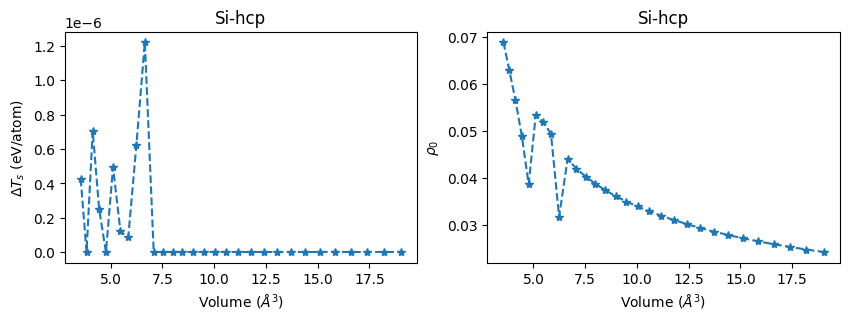

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-hcp')
axs[1].set_title('Si-hcp')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

There exist multiple values of $\rho_{0}$ that can minimize the difference between KS and OF kinetic energy, for that in the two points we run again fe function min_energy and define new bounds where we know there will be a nother $\rho_{0}$ that minimizes the difference between both KE

In [14]:
l = np.linspace(0.8, 1.4, 30)
delta_E1 = []
R1 = []
vol1 = []
for n in np.arange(2,5,1):
    i = int(n)
    rho = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_hcp/rho0_hcp_'+str(i)+'.xsf')
    ions = Ions.from_ase(ase.io.read('/Users/valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.in'))
    KS_KE = ks_ke[i]
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.054,0.06]], options={'ftol' : 1e-6})
    VOLUME = ions.get_volume()
    vol1.append(VOLUME)
    delta_E1.append(minn.fun)
    R1.append(minn.x)

/var/folders/9b/gsh5m3sd3j96rq9k2zstrc_40000gn/T/ipykernel_13087/3235146631.py:10: OptimizeWarning: Initial guess is not within the specified bounds
  minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.054,0.06]], options={'ftol' : 1e-6})


In [41]:
R1

[array([0.05655621]), array([0.05880769]), array([0.055423])]

In [64]:
rho0 = np.asarray(R0)
rho0[2:5] = [np.array([0.059999]), np.array([0.0570769]), np.array([0.055423])]
rho0[8] = [np.array(0.0462)]
d_E = np.asarray(delta_E)
d_E[2:5] = np.asarray(delta_E1[2:5])

Text(0, 0.5, '$ρ_{0}$')

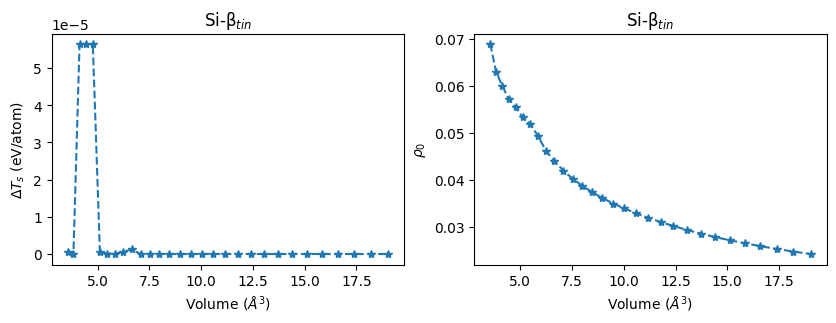

In [65]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [66]:
pwd

'/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_hcp'

In [67]:
np.save("DATA2/rho0.npy", rho0)